# Final Project
Data Set Name: Top 5000 Youtube channels data from Socialblade
URL: https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade#data.csv

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas.core import datetools

C:\Users\Dai\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('C:/Users/Dai/Desktop/IT544Final/data.csv')

## Reading and Cleaning the data

In [4]:
data.shape

(5000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [6]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [7]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [8]:
data['Video Uploads'] = pd.to_numeric(data['Video Uploads'], errors='coerce')
data['Subscribers'] = pd.to_numeric(data['Subscribers'], errors='coerce')
data['Video views'] = pd.to_numeric(data['Video views'], errors='coerce')

In [9]:
data.describe()

,Video Uploads,Subscribers,Video views
count,4994.000000,4.613000e+03,5.000000e+03
mean,3859.463556,2.620004e+06,1.071449e+09
std,17085.866498,3.926447e+06,2.003844e+09
min,1.000000,3.010000e+02,7.500000e+01
25%,141.000000,6.098940e+05,1.862329e+08
50%,443.000000,1.350477e+06,4.820548e+08
75%,1501.750000,2.950056e+06,1.124368e+09
max,422326.000000,6.599531e+07,4.754884e+10


## Visualizing and Presenting Data

### Top 10 Ranking Channels' Subscribers, Video Uploads and Video Views

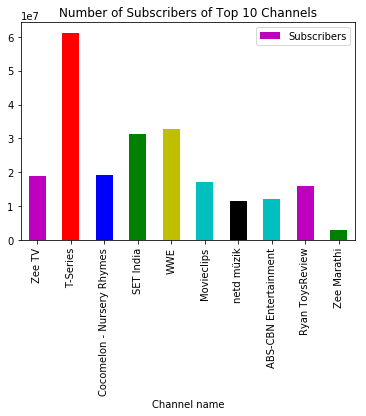

In [10]:
data.head(10).plot.bar(x = 'Channel name', y = 'Subscribers',color='mrbgyckcmg')
plt.title('Number of Subscribers of Top 10 Channels')
plt.show()

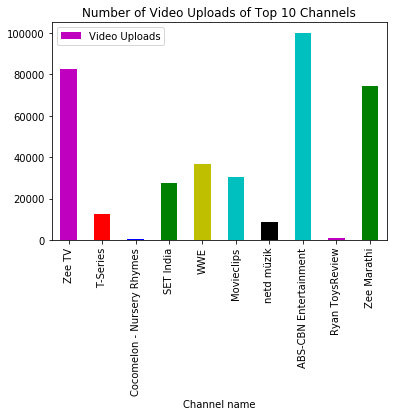

In [11]:
data.head(10).plot.bar(x = 'Channel name', y = 'Video Uploads',color='mrbgyckcmg')
plt.title('Number of Video Uploads of Top 10 Channels')
plt.show()

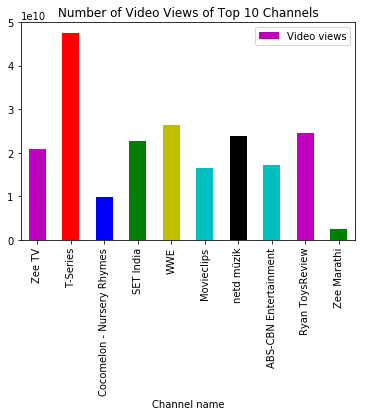

In [12]:
data.head(10).plot.bar(x = 'Channel name', y = 'Video Uploads',color='mrbgyckcmg')
plt.title('Number of Video Uploads of Top 10 Channels')
plt.show()

### Top 10 Channels With the Most Subscribers, Video Uploads and Video Views

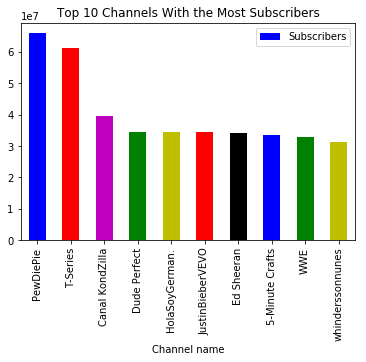

In [13]:
data.sort_values(by = ['Subscribers'], ascending = False).head(10).plot.bar(x = 'Channel name', y = 'Subscribers',color='brmgyrkbgykcmyrbgymc')
plt.title('Top 10 Channels With the Most Subscribers')
plt.show()

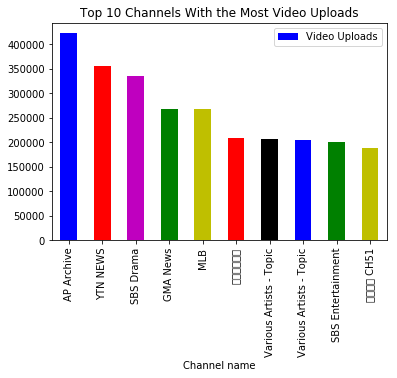

In [14]:
data.sort_values(by = ['Video Uploads'], ascending = False).head(10).plot.bar(x = 'Channel name', y = 'Video Uploads',color='brmgyrkbgykcmyrbgymc')
plt.title('Top 10 Channels With the Most Video Uploads')
plt.show()

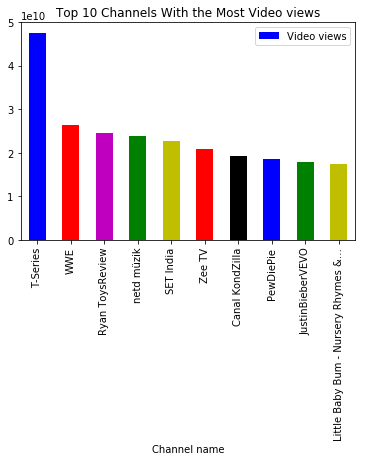

In [15]:
data.sort_values(by = ['Video views'], ascending = False).head(10).plot.bar(x = 'Channel name', y = 'Video views',color='brmgyrkbgykcmyrbgymc')
plt.title('Top 10 Channels With the Most Video views')
plt.show()

### Numbers of Subscribers, Video Uploads and Video Views of All the Channels Distribution

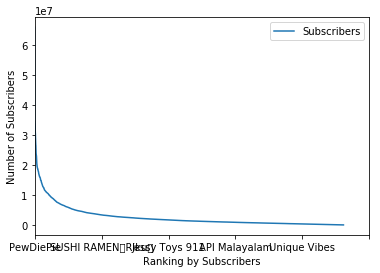

In [16]:
data.sort_values(by = ['Subscribers'], ascending = False).plot(x = 'Channel name', y = 'Subscribers')
plt.xlabel('Ranking by Subscribers')
plt.ylabel('Number of Subscribers')
plt.show()

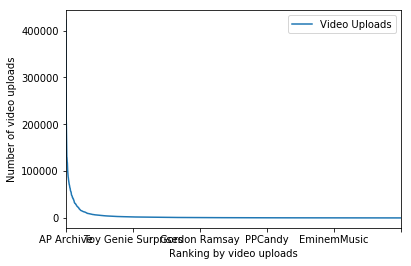

In [17]:
data.sort_values(by = ['Video Uploads'], ascending = False).plot(x = 'Channel name', y = 'Video Uploads')
plt.xlabel('Ranking by video uploads')
plt.ylabel('Number of video uploads')
plt.show()

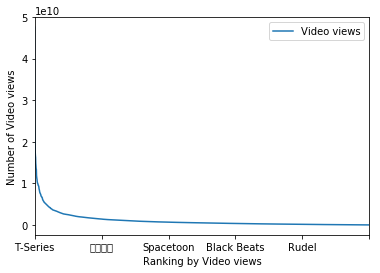

In [18]:
data.sort_values(by = ['Video views'], ascending = False).plot(x = 'Channel name', y = 'Video views')
plt.xlabel('Ranking by Video views')
plt.ylabel('Number of Video views')
plt.show()

### Variable Correlations ---- Correlation Matrix Plot

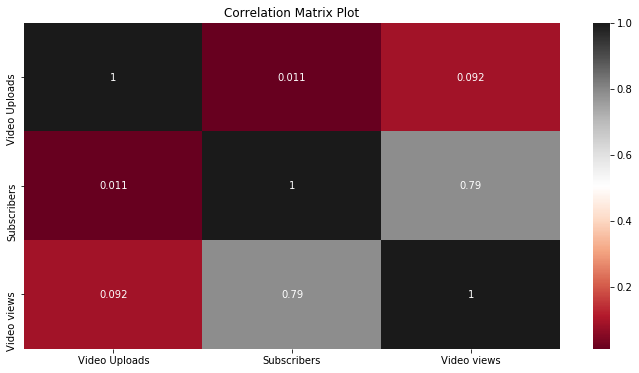

In [19]:
plt.subplots(figsize=(12, 6))
sns.heatmap(data.corr(), cmap = 'RdGy', annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

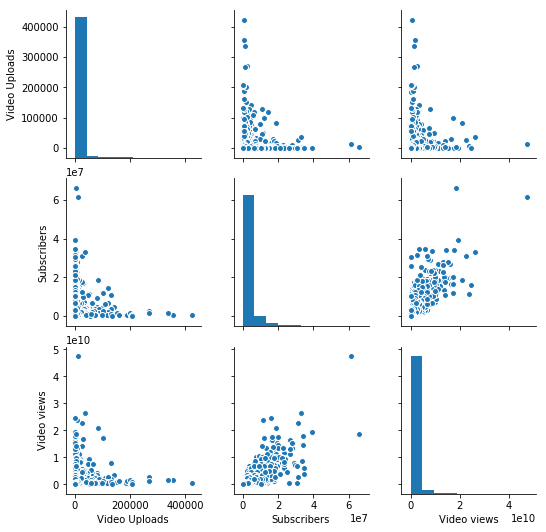

In [78]:
sns.pairplot(data_clean)
plt.show()

## Modeling ---- Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
data_clean = data.dropna()

In [22]:
X = data_clean[['Video Uploads', 'Video views']]
Y = data_clean[['Subscribers']]

In [23]:
#Spliting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
# Fitting the model
lm = LinearRegression()
lm.fit(X_train.dropna(),y_train.dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
#Using test data to predict (Using the number of video uploaded and video views to predict the number of subscribers)
predictions = lm.predict(X_test)

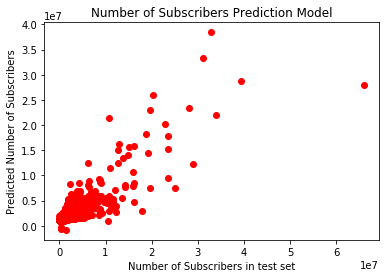

In [25]:
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Number of Subscribers in test set')
plt.ylabel('Predicted Number of Subscribers')
plt.title('Number of Subscribers Prediction Model')
plt.show()

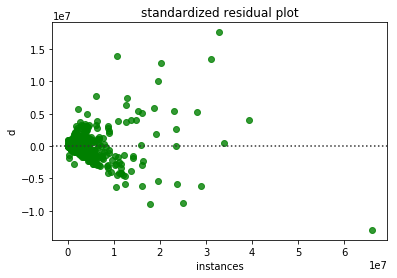

In [26]:
sns.residplot(y_test, predictions,  color="g")
plt.ylabel('d')
plt.xlabel('instances')
plt.title('standardized residual plot')
plt.show()

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1324170.99697
MSE: 6.52109584712e+12
RMSE: 2553643.64137


In [28]:
coefficients = pd.DataFrame(X.columns)
coefficients['coefficients']=lm.coef_[0]
coefficients

,0,coefficients
0,Video Uploads,-12.288941
1,Video views,0.001442


In [29]:
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Subscribers   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     5729.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:47:38   Log-Likelihood:                -74507.
No. Observations:                4610   AIC:                         1.490e+05
Df Residuals:                    4608   BIC:                         1.490e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Video Uploads    -5.5892      2.083     -2.683      0.007      -9.673      -1.505
Video views       0.0017    1.6e-05    105.687      0.000       0.002       0.002
==============================================================================
Omnibus:                     2968.430   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307668.098
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      42.779   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Highly Positively Skewed Variables

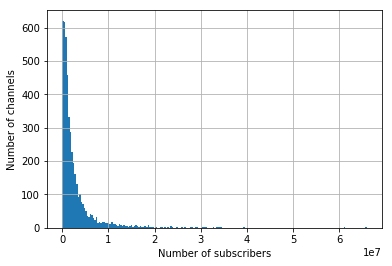

In [30]:
data['Subscribers'].hist(bins = 200)
plt.xlabel('Number of subscribers')
plt.ylabel('Number of channels')
plt.show()

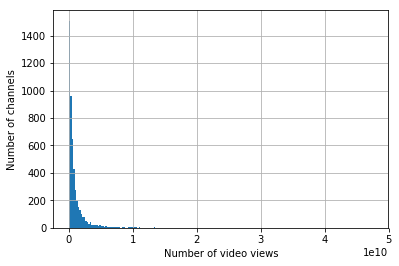

In [31]:
data['Video views'].hist(bins = 200)
plt.xlabel('Number of video views')
plt.ylabel('Number of channels')
plt.show()

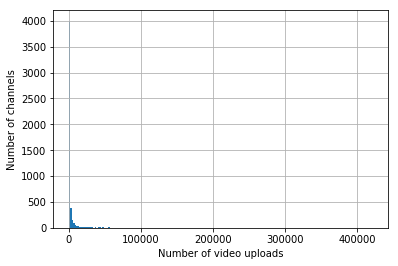

In [32]:
data['Video Uploads'].hist(bins = 200)
plt.xlabel('Number of video uploads')
plt.ylabel('Number of channels')
plt.show()

### Log Transformation

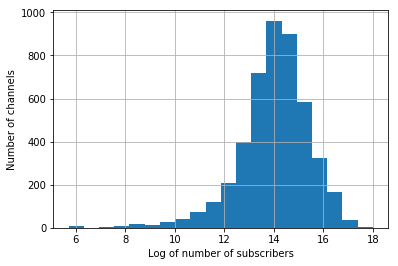

In [33]:
np.log(data['Subscribers']).hist(bins = 20)
plt.xlabel('Log of number of subscribers')
plt.ylabel('Number of channels')
plt.show()

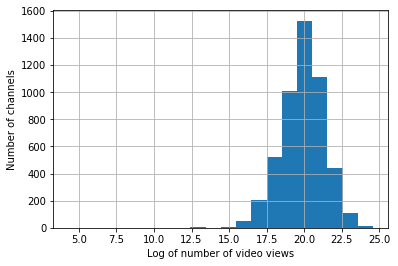

In [34]:
np.log(data['Video views']).hist(bins = 20)
plt.xlabel('Log of number of video views')
plt.ylabel('Number of channels')
plt.show()

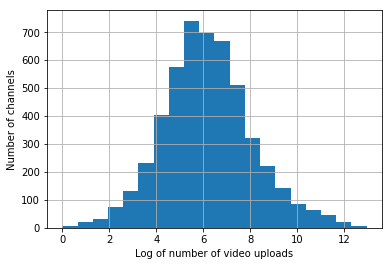

In [35]:
np.log(data['Video Uploads']).hist(bins= 20)
plt.xlabel('Log of number of video uploads')
plt.ylabel('Number of channels')
plt.show()

In [36]:
data_log = pd.DataFrame()
data_log['Video_uploads_log'] = np.log(data_clean['Video Uploads'])
data_log['Video_views_log'] = np.log(data_clean['Video views'])
data_log['Subscribers_log'] = np.log(data_clean['Subscribers'])
data_log.head()

,Video_uploads_log,Video_views_log,Subscribers_log
0,11.323664,23.761568,16.746862
1,9.446282,24.585023,17.929597
2,5.921578,23.004965,16.772411
3,10.215484,23.844571,17.255305
4,10.512057,23.991833,17.307534


### Variable Correlations After Log Transformation

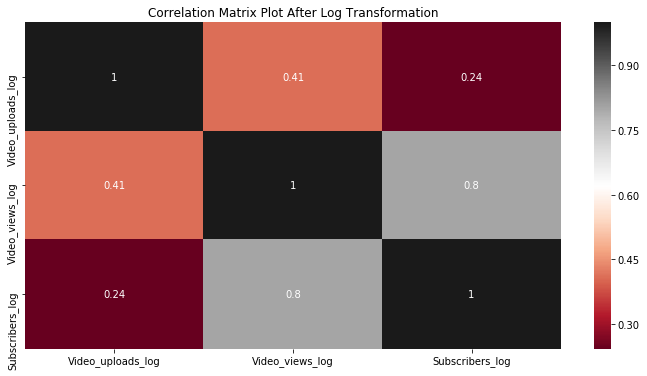

In [37]:
plt.subplots(figsize=(12, 6))
sns.heatmap(data_log.corr(), cmap = 'RdGy', annot=True)
plt.title('Correlation Matrix Plot After Log Transformation')
plt.show()

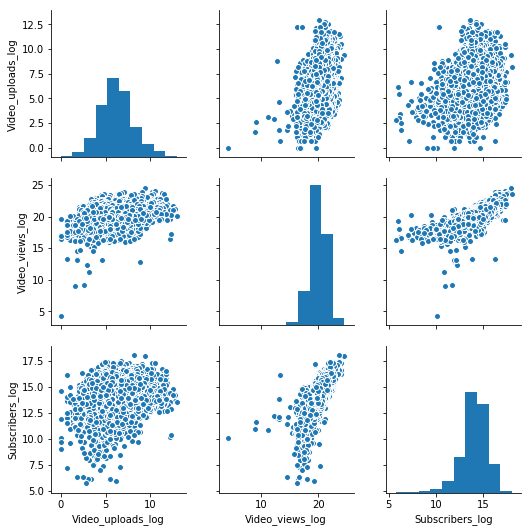

In [38]:
sns.pairplot(data_log)
plt.show()

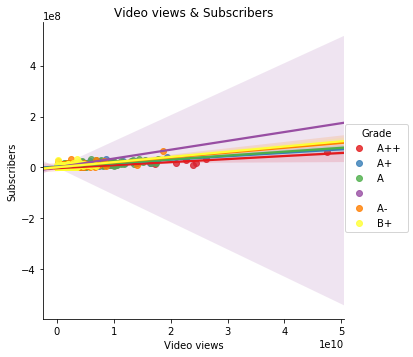

In [46]:
sns.lmplot(data=data,x='Video views', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Video views & Subscribers')
plt.show()

## Linear Model After Log Transformation

In [39]:
X2 = data_log[['Video_uploads_log', 'Video_views_log']]
Y2 = data_log[['Subscribers_log']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2)
lm2 = LinearRegression()
lm2.fit(X2_train.dropna(),y2_train.dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

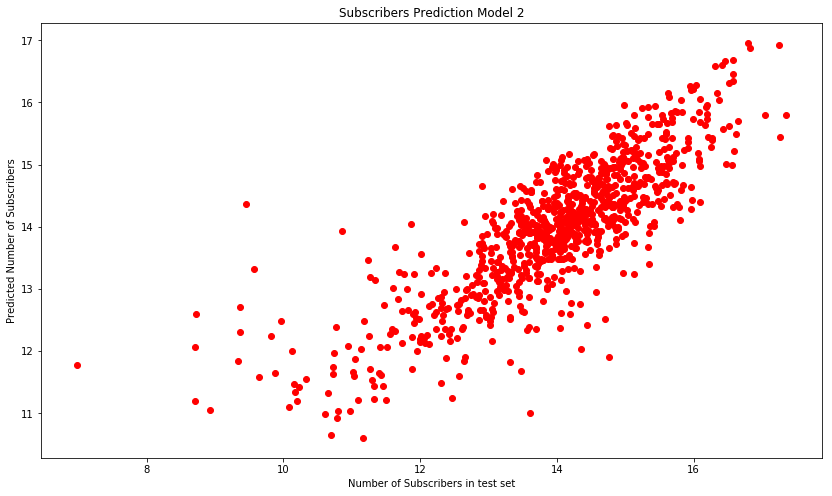

In [40]:
plt.subplots(figsize=(14, 8))
predictions2 = lm2.predict(X2_test)
plt.scatter(y2_test,predictions2, color = 'red')
plt.xlabel('Number of Subscribers in test set')
plt.ylabel('Predicted Number of Subscribers')
plt.title('Subscribers Prediction Model 2')
plt.show()

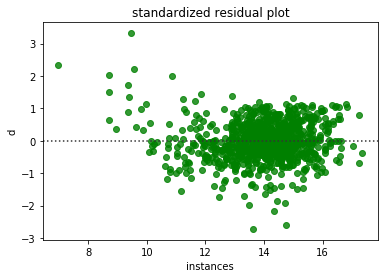

In [41]:
sns.residplot(y2_test, predictions2,  color="g")
plt.ylabel('d')
plt.xlabel('instances')
plt.title('standardized residual plot')
plt.show()

In [42]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 0.547045860189
MSE: 0.597198030303
RMSE: 0.772785889043


In [43]:
coefficients2 = pd.DataFrame(X2.columns)
coefficients2['coefficients']=lm2.coef_[0]
coefficients2

,0,coefficients
0,Video_uploads_log,-0.077757
1,Video_views_log,0.835353


In [44]:
model2 = sm.OLS(Y2, X2).fit() 
predictions2 = model2.predict(X2_test)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Subscribers_log   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.257e+05
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:53:23   Log-Likelihood:                -5807.4
No. Observations:                4610   AIC:                         1.162e+04
Df Residuals:                    4608   BIC:                         1.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Video_uploads_log    -0.0598      0.007     -8.455      0.000      -0.074      -0.046
Video_views_log       0.7199      0.002    312.289      0.000       0.715       0.724
==============================================================================
Omnibus:                     1605.423   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23927.454
Skew:                          -1.248   Prob(JB):                         0.00
Kurtosis:                      13.878   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sns.lmplot(data=data,x='Video views', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Top 5000 Yutube Channels')
plt.show()

### Top 100 Ranking Channels VS Last 100 Ranking Channels

In [48]:
data1 = data[:100]

In [49]:
data1.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [50]:
data1.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
95,96th,A,Luccas Neto,487.0,18703101.0,3564747380
96,97th,A,NollywoodStreams,1528.0,2794475.0,1171653272
97,98th,A,MGR PRODUCTION,2069.0,733903.0,401477421
98,99th,A,BeckyGVEVO,53.0,6658776.0,3518844458
99,100th,A,GMM GRAMMY OFFICIAL,5980.0,13426454.0,13503732638


In [51]:
data2 = data[-100:]

In [52]:
data2.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4900,"4,901st",B+,jaby koay,1902.0,752644.0,486109194
4901,"4,902nd",B+,YouTube Nigerian Movies,700.0,829103.0,253123384
4902,"4,903rd",B+,Скорти,1312.0,1741173.0,590610337
4903,"4,904th",B+,clips mix,2677.0,1840872.0,1341835076
4904,"4,905th",B+,Rahma Riad,22.0,176754.0,40437843


In [53]:
data2.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706.0,2072942.0,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797.0,1055091.0,377331722
4997,"4,998th",B+,Mastersaint,110.0,3265735.0,311758426
4998,"4,999th",B+,Bruce McIntosh,3475.0,32990.0,14563764
4999,"5,000th",B+,SehatAQUA,254.0,21172.0,73312511


In [54]:
data1.describe()

,Video Uploads,Subscribers,Video views
count,100.000000,9.900000e+01,1.000000e+02
mean,12280.470000,1.186049e+07,7.215743e+09
std,27345.199762,9.377073e+06,7.304087e+09
min,3.000000,3.940000e+02,2.246080e+08
25%,366.750000,5.489788e+06,2.482071e+09
50%,1869.000000,1.053869e+07,5.040457e+09
75%,10067.500000,1.584938e+07,9.571360e+09
max,186194.000000,6.119630e+07,4.754884e+10


In [55]:
data2.describe()

,Video Uploads,Subscribers,Video views
count,100.000000,9.300000e+01,1.000000e+02
mean,3149.090000,1.359288e+06,3.952206e+08
std,10294.025453,1.634815e+06,4.076957e+08
min,1.000000,1.629800e+04,5.938610e+05
25%,156.750000,3.653740e+05,1.238584e+08
50%,423.000000,8.291030e+05,3.111038e+08
75%,1435.750000,1.673693e+06,5.015936e+08
max,73616.000000,1.052337e+07,2.378870e+09


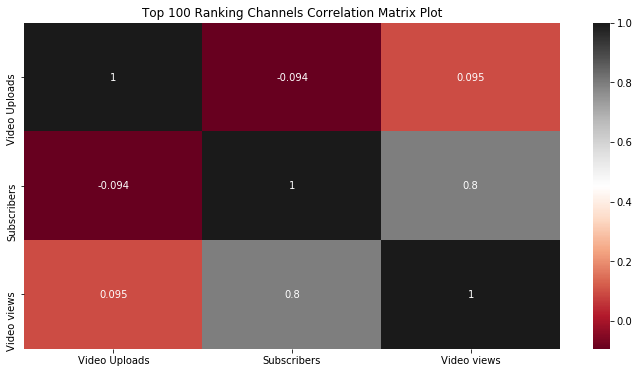

In [58]:
plt.subplots(figsize=(12, 6))
sns.heatmap(data1.corr(), cmap = 'RdGy', annot=True)
plt.title('Top 100 Ranking Channels Correlation Matrix Plot')
plt.show()

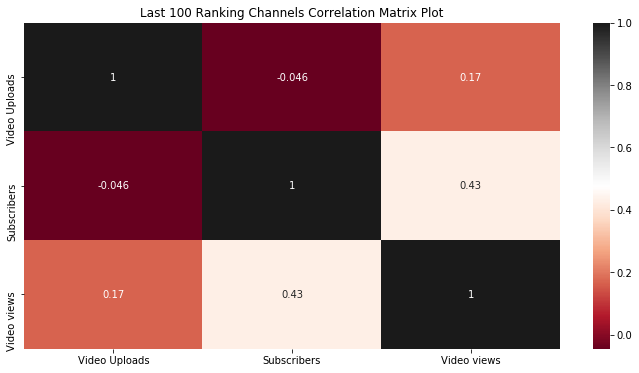

In [57]:
plt.subplots(figsize=(12, 6))
sns.heatmap(data2.corr(), cmap = 'RdGy', annot=True)
plt.title('Last 100 Ranking Channels Correlation Matrix Plot')
plt.show()

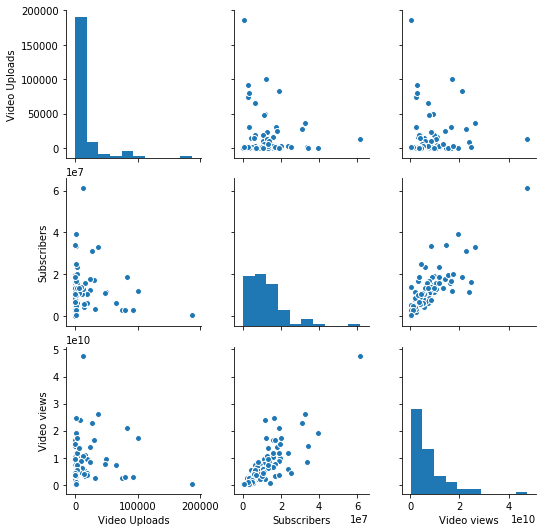

In [59]:
data1_clean = data1.dropna()
sns.pairplot(data1_clean)
plt.show()

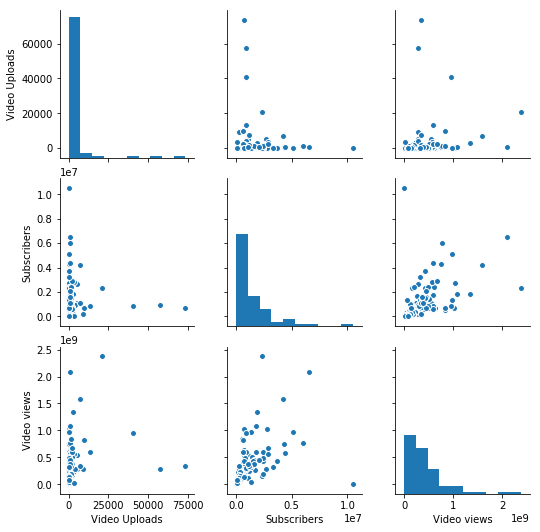

In [60]:
data2_clean = data2.dropna()
sns.pairplot(data2_clean)
plt.show()

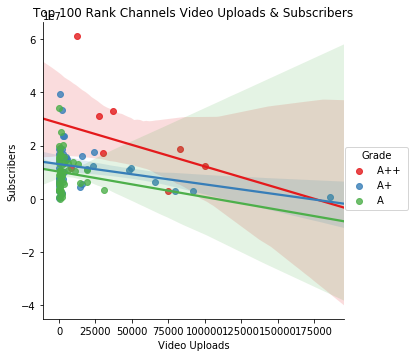

In [61]:
sns.lmplot(data=data1,x='Video Uploads', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Top 100 Rank Channels Video Uploads & Subscribers')
plt.show()

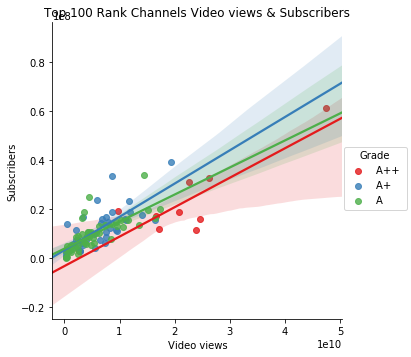

In [62]:
sns.lmplot(data=data1,x='Video views', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Top 100 Rank Channels Video views & Subscribers')
plt.show()

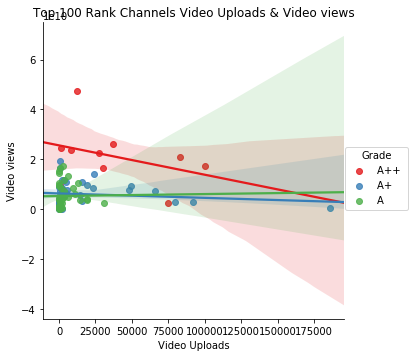

In [64]:
sns.lmplot(data=data1,x='Video Uploads', y='Video views', hue='Grade', palette='Set1')
plt.title('Top 100 Rank Channels Video Uploads & Video views')
plt.show()

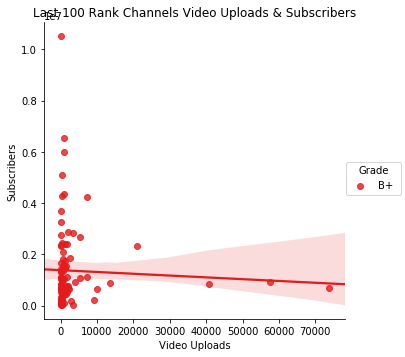

In [65]:
sns.lmplot(data=data2,x='Video Uploads', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Last 100 Rank Channels Video Uploads & Subscribers')
plt.show()

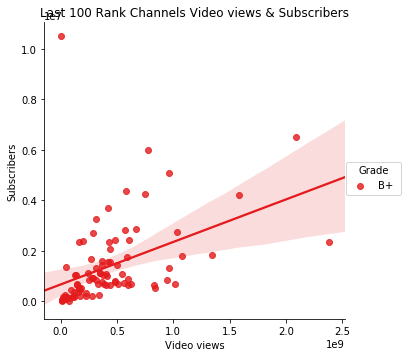

In [67]:
sns.lmplot(data=data2,x='Video views', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Last 100 Rank Channels Video views & Subscribers')
plt.show()

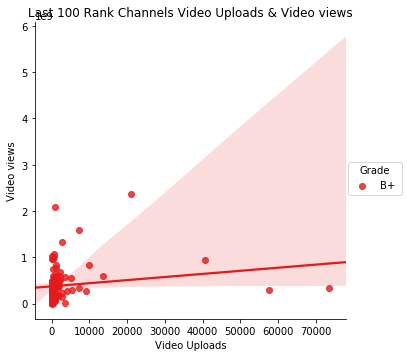

In [68]:
sns.lmplot(data=data2,x='Video Uploads', y='Video views', hue='Grade', palette='Set1')
plt.title('Last 100 Rank Channels Video Uploads & Video views')
plt.show()

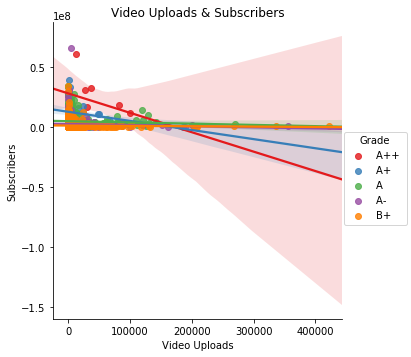

In [69]:
sns.lmplot(data=data_clean,x='Video Uploads', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Video Uploads & Subscribers')
plt.show()

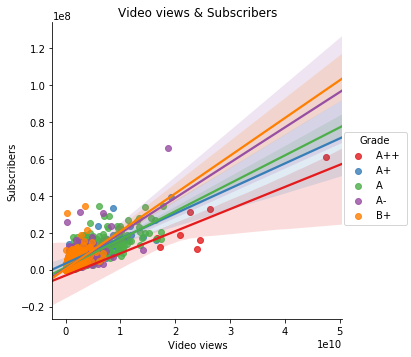

In [70]:
sns.lmplot(data=data_clean,x='Video views', y='Subscribers', hue='Grade', palette='Set1')
plt.title('Video views & Subscribers')
plt.show()

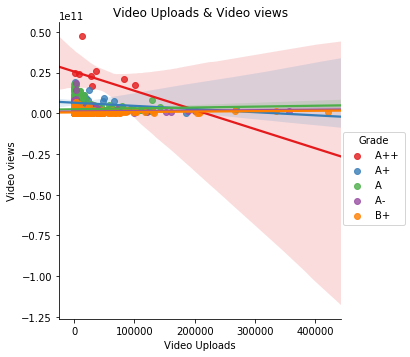

In [71]:
sns.lmplot(data=data_clean,x='Video Uploads', y='Video views', hue='Grade', palette='Set1')
plt.title('Video Uploads & Video views')
plt.show()

### Channel Grades Analyzing

In [72]:
grade_name = list(set(data['Grade']))
grade_name

['A- ', 'A ', 'B+ ', 'A+ ', 'A++ ', '\xa0 ']

In [73]:
data_by_grade = data.set_index(data['Grade'])

count_grade = list()
for grade in grade_name:
    count_grade.append(len(data_by_grade.loc[[grade]]))

In [74]:
data_by_grade.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
Grade,,,,,,
A++,1st,A++,Zee TV,82757.0,18752951.0,20869786591
A++,2nd,A++,T-Series,12661.0,61196302.0,47548839843
A++,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
A++,4th,A++,SET India,27323.0,31180559.0,22675948293
A++,5th,A++,WWE,36756.0,32852346.0,26273668433


In [75]:
print(count_grade)
print(grade_name)

[1024, 963, 2956, 41, 10, 6]
['A- ', 'A ', 'B+ ', 'A+ ', 'A++ ', '\xa0 ']


In [76]:
grade_name[5] = 'missing'
print(count_grade)
print(grade_name)

[1024, 963, 2956, 41, 10, 6]
['A- ', 'A ', 'B+ ', 'A+ ', 'A++ ', 'missing']


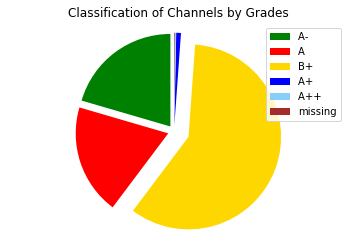

In [77]:
labels = grade_name
sizes = count_grade

explode1 = (0.2, 0.2, 0.5, 0.2, 0.2, 0.2)
color_list = ['green',  'red', 'gold', 'blue', 'lightskyblue', 'brown']

patches, texts = plt.pie(sizes, colors = color_list, explode = explode1, 
                         shadow = False, startangle = 90, radius = 3)
plt.legend(patches, labels, loc = "best")
plt.axis('equal')
plt.title('Classification of Channels by Grades')
plt.show()